# Generate histogram of releases
Code Author: Sahar El Abbadi
Date started: 2023-03-14
Date last edited: 2023-03-14

Notebook objective: to generate a histogram of Stanford releases, categorizing release by type:
- True Positive
- True Negative
- False Negative
- False Positive
- Missing data - overpass recorded in field but not as an overpass by the team
- Stanford Filtered
- Operator Filtered

In [10]:
# Setup
# Imports
from methods_source import load_overpass_summary, make_histogram_bins, classify_confusion_categories, classify_histogram_data
import numpy as np
import pandas as pd



## Evaluate data that passes all QC filters

Select overpasses that pass both Stanford and Operator QC criteria. Generate dataframes for true positive, false positive, true negative, and false negative

In [11]:
# # # Load operator overpass data
# cm_reported = load_overpass_summary(operator='Carbon Mapper', stage=1, strict_discard=False)
# #
# # # Pass all QC filter
# cm_qc_pass = cm_reported.query('qc_summary == "pass_all"')
# #
# # # Select non-zero releases detected by operator
# cm_tp, cm_fp, cm_tn, cm_fn = classify_confusion_categories(cm_qc_pass)
#

In [12]:
# # Create bins for plot
# threshold_lower = 0
# threshold_upper = 50
# n_bins = 10
#
# cm_count_tp = make_histogram_bins(cm_tp, threshold_lower, threshold_upper, n_bins)
# cm_count_fp = make_histogram_bins(cm_fp, threshold_lower, threshold_upper, n_bins)
# cm_count_fn = make_histogram_bins(cm_fn, threshold_lower, threshold_upper, n_bins)
# cm_count_tn = make_histogram_bins(cm_tn, threshold_lower, threshold_upper, n_bins)

In [13]:
# # Filtered by Stanford
# cm_su_qc_fail = cm_reported.query('stanford_kept == False')
# cm_count_su_fail = make_histogram_bins(cm_su_qc_fail, threshold_lower, threshold_upper, n_bins)

In [14]:
# # Filtered by Carbon Mapper
# # if qc_summary is 'fail_operator', this means it passed Stanford QC but not operator QC
# cm_op_qc_fail = cm_reported.query('qc_summary == "fail_operator"')
# cm_count_op_fail = make_histogram_bins(cm_op_qc_fail, threshold_lower, threshold_upper, n_bins)

In [15]:
# # Identify data points where Stanford conducted a release
# # Find data points where we have a flightradar overpass but we do not have an operator overpass
#
# cm_meter_raw, ghg_meter_raw, kairos_meter_raw, mair_meter_raw = load_summary_files()
#
# cm_missing = find_missing_data(cm_meter_raw)
# cm_count_missing = make_histogram_bins(cm_missing, threshold_lower, threshold_upper, n_bins)

In [16]:
# Turn above code into a function

# def classify_histogram_data(operator, stage, strict_discard, threshold_lower, threshold_upper, n_bins):
#     # Load operator overpass data
#     cm_reported = load_overpass_summary(operator=operator, stage=stage, strict_discard=strict_discard)
#
#     # Pass all QC filter
#     cm_qc_pass = cm_reported.query('qc_summary == "pass_all"')
#
#     # Select non-zero releases detected by operator
#     cm_tp, cm_fp, cm_tn, cm_fn = classify_confusion_categories(cm_qc_pass)
#
#     cm_count_tp = make_histogram_bins(cm_tp, threshold_lower, threshold_upper, n_bins).n_data_points
#     cm_count_fp = make_histogram_bins(cm_fp, threshold_lower, threshold_upper, n_bins).n_data_points
#     cm_count_fn = make_histogram_bins(cm_fn, threshold_lower, threshold_upper, n_bins).n_data_points
#     cm_count_tn = make_histogram_bins(cm_tn, threshold_lower, threshold_upper, n_bins).n_data_points
#
#     # Filtered by Stanford
#     cm_su_qc_fail = cm_reported.query('stanford_kept == False')
#     cm_count_su_fail = make_histogram_bins(cm_su_qc_fail, threshold_lower, threshold_upper, n_bins).n_data_points
#
#     # Filtered by Carbon Mapper
#     # if qc_summary is 'fail_operator', this means it passed Stanford QC but not operator QC
#     cm_op_qc_fail = cm_reported.query('qc_summary == "fail_operator"')
#     cm_count_op_fail = make_histogram_bins(cm_op_qc_fail, threshold_lower, threshold_upper, n_bins).n_data_points
#
#     # Identify data points where Stanford conducted a release
#     # Find data points where we have a flightradar overpass but we do not have an operator overpass
#
#     cm_meter_raw, ghg_meter_raw, kairos_meter_raw, mair_meter_raw = load_summary_files()
#
#     cm_missing = find_missing_data(cm_meter_raw)
#     cm_count_missing = make_histogram_bins(cm_missing, threshold_lower, threshold_upper, n_bins).n_data_points
#
#     ################## store data #########################
#
#     summary = pd.DataFrame({
#         'true_positive': cm_count_tp,
#         'false_positive': cm_count_fp,
#         'true_negative': cm_count_tn,
#         'false_negative': cm_count_fn,
#         'filter_stanford': cm_count_su_fail,
#         'filter_operator': cm_count_op_fail,
#         'missing_data': cm_count_missing,
#     })
#
#     return summary



operator='Carbon Mapper'
stage=1
strict_discard=False
# Create bins for plot
threshold_lower = 0
threshold_upper = 50
n_bins = 10

cm_histogram_low = classify_histogram_data(operator, stage, strict_discard, threshold_lower, threshold_upper, n_bins)
threshold_lower = 50
threshold_upper = 1500
n_bins = 30
cm_histogram_high = classify_histogram_data(operator, stage, strict_discard, threshold_lower, threshold_upper, n_bins)


In [17]:
print(cm_histogram_low.bin_height.max())
print(cm_histogram_high.bin_height.max())
test = cm_histogram_low
low_height = cm_histogram_low.bin_height.max()
high_height = cm_histogram_high.bin_height.max()
max(low_height, high_height)

9
17


17

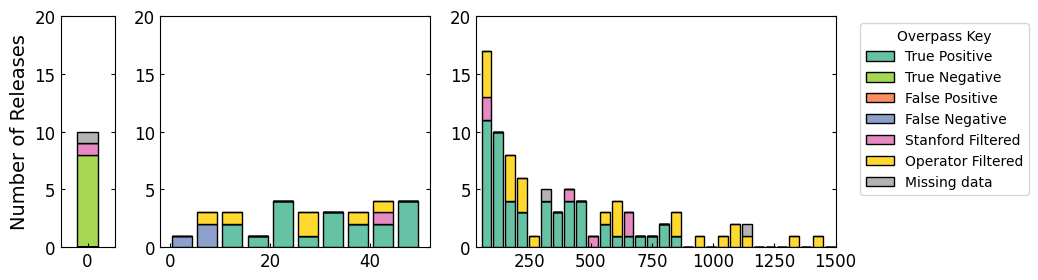

In [35]:
# Make plot of true negatives
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import datetime
import pathlib, math

fig, [ax1, ax2, ax3] = plt.subplots(1,3,
                                    figsize=(10, 3),
                                    gridspec_kw={'width_ratios': [0.6, 3, 4]})

# How high do I need to set my axes? Look at max value for data that will make each histogram
low_height = cm_histogram_low.bin_height.max()
high_height = cm_histogram_high.bin_height.max()
y_height = max(low_height, high_height)
y_height = math.ceil(y_height / 5) * 5

# Color scheme
tp_color = '#66c2a5'
tn_color = '#a6d854'
fp_color = '#fc8d62'
fn_color = '#8da0cb'
su_color = '#e78ac3'
op_color = '#ffd92f'
missing_color = '#b3b3b3'

barWidth = 0.2
# add true negatives
ax1.bar(0, cm_histogram_low.true_negative, width = barWidth, edgecolor='black', color=tn_color)

# Zero release discarded by SU
su_filter_height0 = cm_histogram_low.true_negative
ax1.bar(0, cm_histogram_low.zero_filter_su, bottom=su_filter_height0, width=barWidth, label='Stanford Filtered', edgecolor='black', color=su_color)

# Zero release discarded by operator
op_filter_height0 = np.add(su_filter_height0, cm_histogram_low.zero_filter_su).tolist()
ax1.bar(0, cm_histogram_low.zero_filter_op, bottom=op_filter_height0, width=barWidth, label='Operator Filtered', edgecolor='black', color=op_color)
#
# Missing data zero release
missing_height = np.add(op_filter_height0, cm_histogram_low.zero_filter_op).tolist()
ax1.bar(0, cm_histogram_low.zero_missing, bottom=op_filter_height0, width=barWidth, label='Operator Filtered', edgecolor='black', color=missing_color)

####### Middle histogram
barWidth = 4
# Middle plot
# Add True Positives
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.true_positive, width=barWidth,
        label='True positive', edgecolor='black', color=tp_color)

# Add False Positives
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.false_positive, bottom=cm_histogram_low.true_positive, width=barWidth, label='False positive', edgecolor='black', color=fp_color)

# Add False Negatives
fn_height = np.add(cm_histogram_low.true_positive, cm_histogram_low.false_positive).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.false_negative, bottom=cm_histogram_low.true_positive, width=barWidth, label = 'False Negative', edgecolor='black', color=fn_color)

# Add Stanford QC
su_filter_height = np.add(fn_height, cm_histogram_low.false_negative).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.filter_stanford, bottom=su_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=su_color)

# Add Carbon Mapper QC
op_filter_height = np.add(su_filter_height, cm_histogram_low.filter_stanford).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.filter_operator, bottom=op_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=op_color)

# Add missing data
missing_height = np.add(op_filter_height, cm_histogram_low.filter_operator).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.missing_data, bottom=missing_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=missing_color)

####### Right plot
# reset bin width
barWidth = 40
# Add True Positives
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.true_positive, width=barWidth, label='True positive', edgecolor='black', color=tp_color)

# Add False Positives
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.false_positive, bottom=cm_histogram_high.true_positive, width=barWidth, label='False positive', edgecolor='black', color=fp_color)

# Add False Negatives
fn_height = np.add(cm_histogram_high.true_positive, cm_histogram_high.false_positive).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.false_negative, bottom=cm_histogram_high.true_positive, width=barWidth, label = 'False Negative', edgecolor='black', color=fn_color)

# Add Stanford QC
su_filter_height = np.add(fn_height, cm_histogram_high.false_negative).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.filter_stanford, bottom=su_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=su_color)

# Add Carbon Mapper QC
op_filter_height = np.add(su_filter_height, cm_histogram_high.filter_stanford).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.filter_operator, bottom=op_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=op_color)

# Add missing data
missing_height = np.add(op_filter_height, cm_histogram_high.filter_operator).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.missing_data, bottom=missing_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=missing_color)

############ Plot formatting ############
# Set height of y-axis
ax1.set_ylim(bottom=0, top=y_height)
ax2.set_ylim(bottom=0, top=y_height)
ax3.set_ylim(bottom=0, top=y_height)
ax3.set_xlim(left=30, right=1500)
# Set x-axis for right plot
ax1.set_xlim([-0.25, 0.25]) # set to 12 for now

# Axes formatting and labels
ax1.set_xticks([0])
# ax1.set_yticklabels([1, 2, 4, 6, 8, 10], fontsize=11)
# ax1.set_xlabel('Methane Release Rate (kgh)', fontsize=14)
ax1.set_ylabel('Number of Releases', fontsize=14)
ax1.tick_params(direction='in', right=False, top=False)
ax1.tick_params(labelsize=12)
ax1.minorticks_on()
ax1.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax1.tick_params(direction='in', which='minor', length=3, bottom=False, top=False, left=False, right=False)
ax1.tick_params(direction='in', which='major', length=3, bottom=True, top=False, left=True, right=True)

# Format axes on middle plot
ax2.tick_params(direction='in', right=False, top=False)
ax2.tick_params(labelsize=12)
ax2.minorticks_on()
ax2.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax2.tick_params(direction='in', which='minor', length=3, bottom=False, top=False, left=False, right=False)
ax2.tick_params(direction='in', which='major', length=3, bottom=True, top=False, left=True, right=True)

# Format axes on right plot
ax3.tick_params(direction='in', right=False, top=False)
ax3.tick_params(labelsize=12)
ax3.minorticks_on()
ax3.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax3.tick_params(direction='in', which='minor', length=3, bottom=False, top=False, left=False, right=False)
ax3.tick_params(direction='in', which='major', length=3, bottom=True, top=False, left=True, right=True)


# Set axes and background color to white
ax1.set_facecolor('white')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')

# Add legend

histogram_legend = {
    'True Positive': tp_color,
    'True Negative': tn_color,
    'False Positive': fp_color,
    'False Negative': fn_color,
    'Stanford Filtered': su_color,
    'Operator Filtered': op_color,
    'Missing data': missing_color,
}

legend_elements = [Patch(facecolor=v, edgecolor='black', label=k) for k, v in histogram_legend.items()]
lgd = ax3.legend(title='Overpass Key', handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

# Save figure
now = datetime.datetime.now()
save_time = now.strftime("%Y%m%d")
fig_name = f'histogram_chart_CM_testcode'
fig_path = pathlib.PurePath('04_figures', fig_name)
plt.savefig(fig_path, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [19]:
# import numpy as np
# # np.array(cm_count_tp.n_data_points,
# #          cm_count_tn.n_data_points,
# #          cm_count_fn.n_data_points,
# #          cm_count_fp.n_data_points)
# x = np.maximum(cm_count_tp.n_data_points, np.maximum(cm_count_tn.n_data_points, np.maximum(cm_count_fn.n_data_points, cm_count_fp.n_data_points)))
# print(x)
#
# tp_max = cm_count_tp.n_data_points.max()
# fn_max = cm_count_fn.n_data_points.max()
# tn_max = cm_count_tn.n_data_points.max()
# fp_max = cm_count_fp.n_data_points.max()
# op_max = pd.Series([tp_max, fn_max, tn_max, fp_max])
# y_max = op_max.max()

In [20]:
print(cm_histogram_high)

     bin_median  true_positive  false_positive  true_negative  false_negative  \
0     74.166667             11               0              0               0   
1    122.500000             10               0              0               0   
2    170.833333              4               0              0               0   
3    219.166667              3               0              0               0   
4    267.500000              0               0              0               0   
5    315.833333              4               0              0               0   
6    364.166667              3               0              0               0   
7    412.500000              4               0              0               0   
8    460.833333              4               0              0               0   
9    509.166667              0               0              0               0   
10   557.500000              2               0              0               0   
11   605.833333             